# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_validate, train_test_split
from matplotlib import rc,rcParams
import itertools
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f'%x)

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


## Explorer Data Analysis

In [7]:
V_cols = df.columns[df.columns.str.contains("V")].tolist()
df_V = df.loc[:, df.columns.str.contains("V")]

In [8]:
df_V.min().min(), df_V.max().max(), df_V.mean().mean()

(-113.743306711146, 120.589493945238, np.float64(7.627407802383963e-16))

### Imbalanced Values

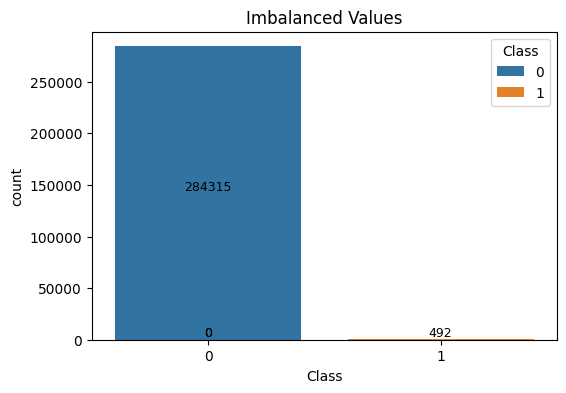

In [9]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Class'], data=df, hue='Class')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2 , p.get_height()/2),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title("Imbalanced Values")
plt.show()

### Amount Distribution

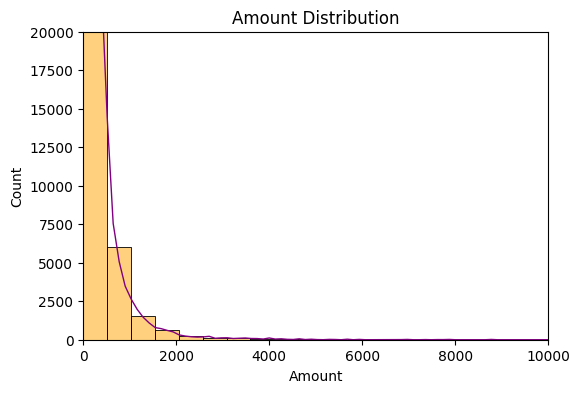

In [10]:
plt.figure(figsize=(6,4))
ax = sns.histplot(x=df['Amount'],data=df, bins=50,color='orange', kde=True)
for line in ax.lines:
    line.set_color('purple')
    line.set_linewidth(1)
ax.set_ylim(0,20000)
ax.set_xlim(0,10000)
plt.title("Amount Distribution")
plt.show()


### Distribution of The Time

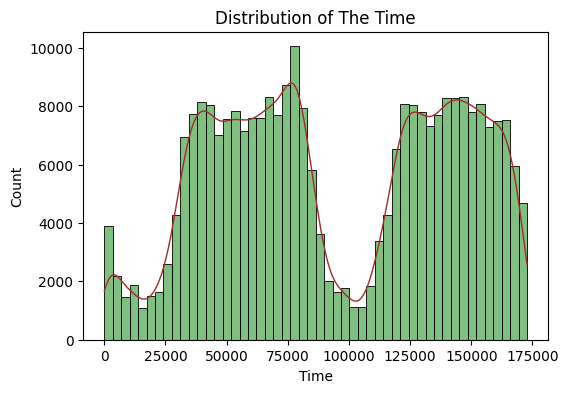

In [11]:
plt.figure(figsize=(6,4))
ax = sns.histplot(x=df['Time'],data=df, bins=50,color='green', kde=True)
for line in ax.lines:
    line.set_color('brown')
    line.set_linewidth(1)
plt.title("Distribution of The Time")
plt.show()


## Scaler

In [12]:
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Base Model

In [13]:
X= df.drop('Class',axis=1)
y = df['Class']

X_train, X_test, y_train, y_test  =train_test_split(X, y, test_size=0.2, random_state=234)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy  = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9992626663389628


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.89      0.69      0.78       107

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### **The Inference**

**Although Accuracy of Base Model is very good, Recall of Base Model is very low.**

## Resampling

### Random Over Sampling

In [16]:
ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros.value_counts()

,count
Class,
0,227460
1,227460


In [17]:
model.fit(X_ros, y_ros)
y_pred = model.predict(X_test)
print("Random Over Sampling Classification Report".center(70), '\n\n',classification_report(y_test, y_pred))

              Random Over Sampling Classification Report               

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56855
           1       0.07      0.91      0.13       107

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### SMOTE Sampling

In [18]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote.value_counts()

,count
Class,
0,227460
1,227460


In [19]:
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)
print("SMOTE Sampling Classification Report".center(70), '\n\n',classification_report(y_test, y_pred))

                 SMOTE Sampling Classification Report                  

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56855
           1       0.06      0.90      0.12       107

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## Random Under Sampling

In [20]:
undersampler  = RandomUnderSampler(sampling_strategy='majority')
X_undersample, y_undersample  = undersampler.fit_resample(X_train, y_train)
y_undersample.value_counts()

,count
Class,
0,385
1,385


In [21]:
model.fit(X_undersample, y_undersample)
y_pred = model.predict(X_test)
print("Random Under Sampling Classification Report".center(70), '\n\n',classification_report(y_test, y_pred))

             Random Under Sampling Classification Report               

               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56855
           1       0.05      0.92      0.09       107

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



### ADASYN (Adaptive Synthetic Sampling)

In [22]:
adasyn = ADASYN(sampling_strategy='minority')
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
y_adasyn.value_counts()

,count
Class,
0,227460
1,227425


In [23]:
model.fit(X_adasyn, y_adasyn)
y_pred = model.predict(X_test)
print("ADASYN Sampling Classification Report".center(70), '\n\n',classification_report(y_test, y_pred))

                ADASYN Sampling Classification Report                  

               precision    recall  f1-score   support

           0       1.00      0.92      0.96     56855
           1       0.02      0.93      0.04       107

    accuracy                           0.92     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.92      0.96     56962



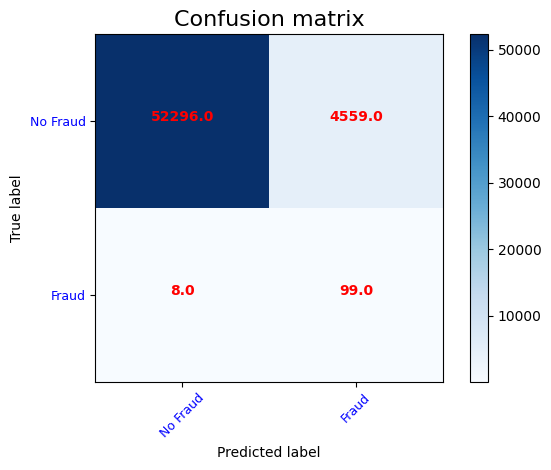

In [24]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=9,color="blue")
    plt.yticks(tick_marks, classes,fontsize=9,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'10'})
    plt.xlabel('Predicted label',fontdict={'size':'10'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['No Fraud','Fraud'],
                      title='Confusion matrix')